Import Library

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import gymnasium as gym
from datetime import datetime

Input Data

In [3]:
df = pd.read_csv('data.csv', encoding='ISO-8859-1')
df.head(50)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


Cleaning Data

In [5]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

Tidak ada data duplicate

In [6]:
to_drop=['InvoiceNo']
df.drop(to_drop, inplace=True, axis=1)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 536641 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   StockCode    536641 non-null  object 
 1   Description  535187 non-null  object 
 2   Quantity     536641 non-null  int64  
 3   InvoiceDate  536641 non-null  object 
 4   UnitPrice    536641 non-null  float64
 5   CustomerID   401604 non-null  float64
 6   Country      536641 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 32.8+ MB


In [8]:
df.isna()

,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
541904,False,False,False,False,False,False,False
541905,False,False,False,False,False,False,False
541906,False,False,False,False,False,False,False
541907,False,False,False,False,False,False,False


drop data 0 

In [9]:
df.dropna(axis=0, inplace=True)

menjelaskan waktu

In [10]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%m/%d/%Y %H:%M')

In [11]:
df['Description'].value_counts()

Description
WHITE HANGING HEART T-LIGHT HOLDER    2058
REGENCY CAKESTAND 3 TIER              1894
JUMBO BAG RED RETROSPOT               1659
PARTY BUNTING                         1409
ASSORTED COLOUR BIRD ORNAMENT         1405
                                      ... 
PINK/WHITE GLASS DEMI CHOKER             1
 I LOVE LONDON MINI RUCKSACK             1
SET 36 COLOURING PENCILS DOILEY          1
SET 12 COLOURING PENCILS DOILEY          1
PEARL AND CHERRY QUARTZ BRACLET          1
Name: count, Length: 3896, dtype: int64

menyisihkan 1 kategori penjualan

In [12]:
df1 = df[df['Description'].isin(['WHITE HANGING HEART T-LIGHT HOLDER'])]

In [13]:
df1.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,2058.000000,2058,2058.000000,2058.000000
mean,16.583090,2011-06-05 23:22:25.451895296,2.891020,15562.338192
min,-1930.000000,2010-12-01 08:26:00,2.400000,12370.000000
25%,3.000000,2011-03-02 12:53:15,2.950000,14239.000000
50%,6.000000,2011-05-28 13:09:00,2.950000,15601.000000
75%,12.000000,2011-09-19 11:03:30,2.950000,16931.000000
max,1930.000000,2011-12-08 19:55:00,5.790000,18283.000000
std,87.704581,NaN,0.247401,1615.571342


In [14]:
df1.head(40)

,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
49,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 09:02:00,2.55,17850.0,United Kingdom
66,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 09:32:00,2.55,17850.0,United Kingdom
220,85123A,WHITE HANGING HEART T-LIGHT HOLDER,64,2010-12-01 10:19:00,2.55,17511.0,United Kingdom
262,85123A,WHITE HANGING HEART T-LIGHT HOLDER,32,2010-12-01 10:39:00,2.55,13408.0,United Kingdom
278,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 10:51:00,2.55,17850.0,United Kingdom
364,85123A,WHITE HANGING HEART T-LIGHT HOLDER,4,2010-12-01 11:21:00,2.95,15862.0,United Kingdom
416,85123A,WHITE HANGING HEART T-LIGHT HOLDER,8,2010-12-01 11:33:00,2.55,17850.0,United Kingdom
935,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 12:36:00,2.95,16552.0,United Kingdom
979,85123A,WHITE HANGING HEART T-LIGHT HOLDER,3,2010-12-01 12:43:00,2.95,14729.0,United Kingdom


melihat apakah penjualan naik turun

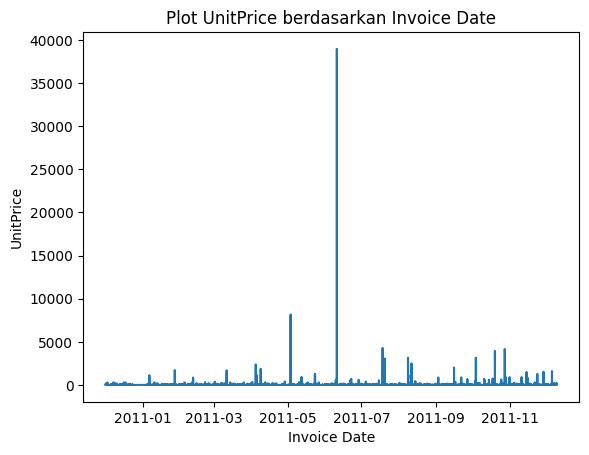

In [15]:
plt.plot(df['InvoiceDate'], df['UnitPrice'])
plt.xlabel('Invoice Date')
plt.ylabel('UnitPrice')
plt.title('Plot UnitPrice berdasarkan Invoice Date')
plt.show()

mencoba menggunakan gymnasium

buat enviroment

In [16]:
env = gym.make("Taxi-v3", render_mode="rgb_array")
env.reset()
env.render()

array([[[110, 109, 106],
        [110, 109, 106],
        [124, 122, 122],
        ...,
        [108, 111, 109],
        [108, 111, 109],
        [118, 119, 119]],

       [[110, 109, 106],
        [110, 109, 106],
        [124, 122, 122],
        ...,
        [108, 111, 109],
        [108, 111, 109],
        [118, 119, 119]],

       [[114, 116, 115],
        [114, 116, 115],
        [126, 127, 126],
        ...,
        [112, 113, 111],
        [112, 113, 111],
        [118, 117, 115]],

       ...,

       [[116, 115, 116],
        [116, 115, 116],
        [106, 107, 108],
        ...,
        [113, 115, 114],
        [113, 115, 114],
        [117, 114, 117]],

       [[116, 115, 116],
        [116, 115, 116],
        [106, 107, 108],
        ...,
        [113, 115, 114],
        [113, 115, 114],
        [117, 114, 117]],

       [[115, 112, 112],
        [115, 112, 112],
        [119, 119, 117],
        ...,
        [123, 119, 118],
        [123, 119, 118],
        [114, 114, 117]]

Mengembalikan enviroment ke keadaan awal

In [17]:
env.reset() # reset environment menjadi baru
env.render()

print("Action Space {}".format(env.action_space))
print("State Space {}".format(env.observation_space))

Action Space Discrete(6)
State Space Discrete(500)


terdapat 6 aksi = utara, barat, selatan, timur, mengangkut penumpang dan menurunkan penumpang

terdapat 500 tempat

Solve enviroment without reinforcement

In [18]:
env.s = 328  # set environment to illustration's state

epochs = 0
penalties, reward = 0, 0

frames = [] # for animation

done = False

while not done:
    action = env.action_space.sample()
    result = env.step(action)
    state, reward, done, info = result[:4]
    if reward == -10:
        penalties += 1
    
    # Put each rendered frame into dict for animation
    frames.append({
        'frame': env.render(),
        'state': state,
        'action': action,
        'reward': reward
        }
    )

    epochs += 1
    
    
print("Timesteps taken: {}".format(epochs))
print("Penalties incurred: {}".format(penalties))

Timesteps taken: 2349
Penalties incurred: 776


In [23]:
q_table = np.zeros([env.observation_space.n, env.action_space.n])

In [28]:
from IPython.display import clear_output
from time import sleep

def print_frames(frames):
    for i, frame in enumerate(frames):
        clear_output(wait=True)
        print(frame['frame'])
        print(f"Timestep: {i + 1}")
        print(f"State: {frame['state']}")
        print(f"Action: {frame['action']}")
        print(f"Reward: {frame['reward']}")
        sleep(.1)
        
print_frames(frames)

[[[110 109 106]
  [110 109 106]
  [124 122 122]
  ...
  [108 111 109]
  [108 111 109]
  [118 119 119]]

 [[110 109 106]
  [110 109 106]
  [124 122 122]
  ...
  [108 111 109]
  [108 111 109]
  [118 119 119]]

 [[114 116 115]
  [114 116 115]
  [126 127 126]
  ...
  [112 113 111]
  [112 113 111]
  [118 117 115]]

 ...

 [[116 115 116]
  [116 115 116]
  [106 107 108]
  ...
  [113 115 114]
  [113 115 114]
  [117 114 117]]

 [[116 115 116]
  [116 115 116]
  [106 107 108]
  ...
  [113 115 114]
  [113 115 114]
  [117 114 117]]

 [[115 112 112]
  [115 112 112]
  [119 119 117]
  ...
  [123 119 118]
  [123 119 118]
  [114 114 117]]]
Timestep: 249
State: 68
Action: 1
Reward: -1


KeyboardInterrupt: 

menggunakan q learning untuk melatih via reinforcement 

In [29]:
import numpy as np

q_table = np.zeros([env.observation_space.n, env.action_space.n])

Training Agent

In [30]:
%%time
"""Training the agent"""

import random
from IPython.display import clear_output

# Hyperparameters
alpha = 0.1
gamma = 0.6
epsilon = 0.1

# For plotting metrics
all_epochs = []
all_penalties = []

for i in range(1, 100001):
    state = env.reset()

    epochs, penalties, reward, = 0, 0, 0
    done = False
    
    while not done:
        if random.uniform(0, 1) < epsilon:
            action = env.action_space.sample() # Explore action space
        else:
            action = np.argmax(q_table[state]) # Exploit learned values

        next_state, reward, done, info = env.step(action) 
        
        old_value = q_table[state, action]
        next_max = np.max(q_table[next_state])
        
        new_value = (1 - alpha) * old_value + alpha * (reward + gamma * next_max)
        q_table[state, action] = new_value

        if reward == -10:
            penalties += 1

        state = next_state
        epochs += 1
        
    if i % 100 == 0:
        clear_output(wait=True)
        print(f"Episode: {i}")

print("Training finished.\n")

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [53]:
print(q_table[state])

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

evaluasi agen

In [50]:
"""Evaluate agent's performance after Q-learning"""

total_epochs, total_penalties = 0, 0
episodes = 100

for _ in range(episodes):
    state = env.reset()
    epochs, penalties, reward = 0, 0, 0
    
    done = False
    
    while not done:
        action = np.argmax(q_table[state])
        state, reward, done, info = env.step(action)

        if reward == -10:
            penalties += 1

        epochs += 1

    total_penalties += penalties
    total_epochs += epochs

print(f"Results after {episodes} episodes:")
print(f"Average timesteps per episode: {total_epochs / episodes}")
print(f"Average penalties per episode: {total_penalties / episodes}")

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

Mencoba Untuk Dynamic Pricing

In [44]:
df1.head(40)

,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
49,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 09:02:00,2.55,17850.0,United Kingdom
66,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 09:32:00,2.55,17850.0,United Kingdom
220,85123A,WHITE HANGING HEART T-LIGHT HOLDER,64,2010-12-01 10:19:00,2.55,17511.0,United Kingdom
262,85123A,WHITE HANGING HEART T-LIGHT HOLDER,32,2010-12-01 10:39:00,2.55,13408.0,United Kingdom
278,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 10:51:00,2.55,17850.0,United Kingdom
364,85123A,WHITE HANGING HEART T-LIGHT HOLDER,4,2010-12-01 11:21:00,2.95,15862.0,United Kingdom
416,85123A,WHITE HANGING HEART T-LIGHT HOLDER,8,2010-12-01 11:33:00,2.55,17850.0,United Kingdom
935,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 12:36:00,2.95,16552.0,United Kingdom
979,85123A,WHITE HANGING HEART T-LIGHT HOLDER,3,2010-12-01 12:43:00,2.95,14729.0,United Kingdom


In [45]:
for index, row in df1.iterrows():
    # Ambil informasi harga dan permintaan dari dataset
    harga = row['UnitPrice']
    permintaan = row['Quantity']
    
    # Tentukan reward berdasarkan harga dan permintaan
    if permintaan > 6 and harga > 2.55:
        reward = 1
    elif permintaan <= 6 and harga > 2.55:
        reward = -1
    else:
        reward = 0

In [40]:
# Parameter Q-Learning
alpha = 0.1  # Learning rate
gamma = 0.6  # Discount factor
epsilon = 0.1

# Loop untuk setiap step dalam episode
while not done:
    # Pilih aksi berdasarkan policy saat ini (misalnya, epsilon-greedy)
    if np.random.uniform(0, 1) < epsilon:
        action = env.action_space.sample()  # Eksplorasi
    else:
        action = np.argmax(q_table[state])  # Eksploitasi

    # Ambil aksi dan dapatkan hasilnya
    next_state, reward, done, info = env.step(action)

    # Update Q-table
    old_value = q_table[state, action]
    next_max = np.max(q_table[next_state])

    # Rumus Q-Learning untuk update Q-table
    new_value = (1 - alpha) * old_value + alpha * (reward + gamma * next_max)
    q_table[state, action] = new_value

    # Pindah ke state baru
    state = next_state

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [33]:
def calculate_reward(sales_data, action, time_data):
    # 'action' mungkin merupakan harga yang ditetapkan
    # 'time_data' berisi informasi waktu, seperti hari atau jam

    harga = action
    time_factor = time_data.get('InvoiceDate')  # Faktor yang menyesuaikan reward berdasarkan waktu

    # Misalnya, reward bisa lebih tinggi pada akhir pekan atau jam-jam tertentu
    reward = (harga) * time_factor
    return reward

In [46]:
# Parameter Q-Learning
alpha = 0.1  # Learning rate
gamma = 0.6  # Discount factor
epsilon = 0.1  # Eksplorasi rate

# Untuk pelatihan
for i in range(1000):  # Jumlah episode
    state = env.reset()  # Reset state awal untuk setiap episode
    done = False
    
    while not done:
        if np.random.uniform(0, 1) < epsilon:
            # Eksplorasi: pilih aksi secara acak
            action = env.action_space.sample()
        else:
            # Eksploitasi: pilih aksi dengan nilai Q terbesar
            action = np.argmax(q_table[state])

        # meengambil act lalu mendapatkan hasilnya
        next_state, reward, done, info = env.step(action)

        harga = df1.loc[df1.index == i, 'UnitPrice'].values[0]
        permintaan = df1.loc[df1.index == i, 'Quantity'].values[0]
        
        # Tentukan reward berdasarkan logika bisnis Anda
        if permintaan > 6 and harga > 2.55:
            reward = 1
        elif permintaan <= 6 and harga > 2.55:
            reward = -1
        else:
            reward = 0
            
        # Update Q-table
        old_value = q_table[state, action]
        next_max = np.max(q_table[next_state])
        
        # Rumus Q-Learning untuk update Q-table
        new_value = (1 - alpha) * old_value + alpha * (reward + gamma * next_max)
        q_table[state, action] = new_value

        state = next_state

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices